In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname = "C:\\Windows\\Fonts\\malgun.ttf").get_name()
plt.rc("font", family=font_name)

# 음수지원
import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

# 1. 주차수요 히트맵

In [5]:
pre = pd.read_csv("data/pre_train.csv", encoding = "euc-kr")
pre.head()
pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2869 entries, 0 to 2868
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2869 non-null   int64  
 1   단지코드        2869 non-null   object 
 2   총세대수        2869 non-null   int64  
 3   임대건물구분      2869 non-null   object 
 4   지역          2869 non-null   object 
 5   전용면적        2869 non-null   float64
 6   전용면적별세대수    2869 non-null   int64  
 7   빈집          2869 non-null   float64
 8   임대료         2300 non-null   object 
 9   노선수         2869 non-null   float64
 10  버스          2869 non-null   float64
 11  주차면수        2869 non-null   float64
 12  등록차량수       2869 non-null   float64
dtypes: float64(6), int64(3), object(4)
memory usage: 291.5+ KB


In [6]:
pre.drop("Unnamed: 0", axis = 1, inplace = True)
pre.head()

,단지코드,총세대수,임대건물구분,지역,전용면적,전용면적별세대수,빈집,임대료,노선수,버스,주차면수,등록차량수
0,C2515,545,아파트,경상남도,33.48,276,17.0,82940,0.0,3.0,624.0,205.0
1,C2515,545,아파트,경상남도,39.60,60,17.0,107130,0.0,3.0,624.0,205.0
2,C2515,545,아파트,경상남도,39.60,20,17.0,107130,0.0,3.0,624.0,205.0
3,C2515,545,아파트,경상남도,46.90,38,17.0,149760,0.0,3.0,624.0,205.0
4,C2515,545,아파트,경상남도,46.90,19,17.0,149760,0.0,3.0,624.0,205.0


#### '임대료'의 경우 결측치가 있어서 빼고 진행
#### 문자열 데이터인 '단지코드', '임대건물구분', '지역' 제외하고 진행

In [7]:
pre.drop(["임대료", "단지코드", "임대건물구분", "지역"], axis = 1, inplace = True)
pre.head()

,총세대수,전용면적,전용면적별세대수,빈집,노선수,버스,주차면수,등록차량수
0,545,33.48,276,17.0,0.0,3.0,624.0,205.0
1,545,39.60,60,17.0,0.0,3.0,624.0,205.0
2,545,39.60,20,17.0,0.0,3.0,624.0,205.0
3,545,46.90,38,17.0,0.0,3.0,624.0,205.0
4,545,46.90,19,17.0,0.0,3.0,624.0,205.0


In [8]:
pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2869 entries, 0 to 2868
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   총세대수      2869 non-null   int64  
 1   전용면적      2869 non-null   float64
 2   전용면적별세대수  2869 non-null   int64  
 3   빈집        2869 non-null   float64
 4   노선수       2869 non-null   float64
 5   버스        2869 non-null   float64
 6   주차면수      2869 non-null   float64
 7   등록차량수     2869 non-null   float64
dtypes: float64(6), int64(2)
memory usage: 179.4 KB


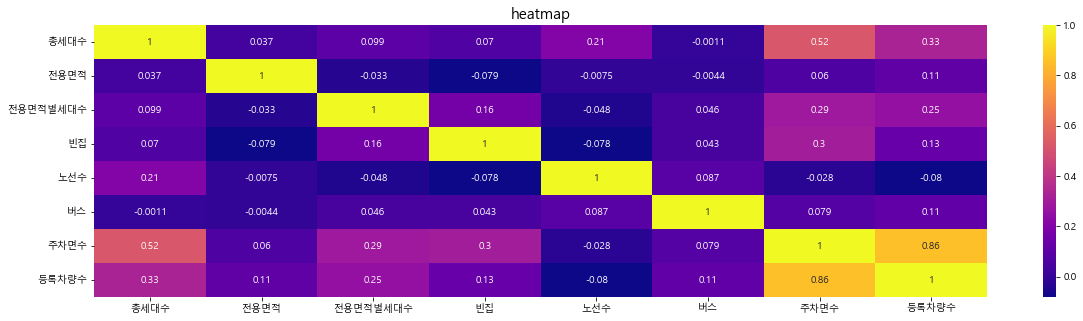

In [11]:
plt.figure(figsize=(20,5))
hmap = sns.heatmap(pre.corr(), cmap = 'plasma', annot = True)
hmap.set_title("heatmap", fontsize=15)
plt.show()

- 전용면적과 주차면수 상관관계 낮음
- 지역별 차이가 있을 것
- 지역별로 전용면적과 주차면수의 상관관계 확인

- 집값

- 버스+노선수, 나이(노인+청소년), 실제 세대 수 변수 추가

# 2. 버스+노선수, 나이(노인+청소년) 변수 추가하여 히트맵

In [80]:
pre2 = pd.read_csv("data/pre_train.csv", encoding = "euc-kr")
pre2.head()
pre2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2869 entries, 0 to 2868
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2869 non-null   int64  
 1   단지코드        2869 non-null   object 
 2   총세대수        2869 non-null   int64  
 3   임대건물구분      2869 non-null   object 
 4   지역          2869 non-null   object 
 5   전용면적        2869 non-null   float64
 6   전용면적별세대수    2869 non-null   int64  
 7   빈집          2869 non-null   float64
 8   임대료         2300 non-null   object 
 9   노선수         2869 non-null   float64
 10  버스          2869 non-null   float64
 11  주차면수        2869 non-null   float64
 12  등록차량수       2869 non-null   float64
dtypes: float64(6), int64(3), object(4)
memory usage: 291.5+ KB


In [81]:
age = pd.read_csv("data/agedata_Final.csv", encoding = "euc-kr")
age.head()
age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  16 non-null     int64  
 1   지역          16 non-null     object 
 2   X노인과청소년합    16 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 512.0+ bytes


In [82]:
age.drop("Unnamed: 0", axis=1, inplace = True)

In [83]:
age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   지역        16 non-null     object 
 1   X노인과청소년합  16 non-null     float64
dtypes: float64(1), object(1)
memory usage: 384.0+ bytes


In [84]:
pre2 = pd.merge(pre2, age, on='지역')

In [85]:
pre2.drop("Unnamed: 0", axis=1, inplace=True)

In [86]:
pre2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2869 entries, 0 to 2868
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   단지코드      2869 non-null   object 
 1   총세대수      2869 non-null   int64  
 2   임대건물구분    2869 non-null   object 
 3   지역        2869 non-null   object 
 4   전용면적      2869 non-null   float64
 5   전용면적별세대수  2869 non-null   int64  
 6   빈집        2869 non-null   float64
 7   임대료       2300 non-null   object 
 8   노선수       2869 non-null   float64
 9   버스        2869 non-null   float64
 10  주차면수      2869 non-null   float64
 11  등록차량수     2869 non-null   float64
 12  X노인과청소년합  2869 non-null   float64
dtypes: float64(7), int64(2), object(4)
memory usage: 313.8+ KB


In [87]:
pre2["대중교통"] = pre2["노선수"] + pre2["버스"]
pre2["노인청소년합"] = pre2["X노인과청소년합"]

In [88]:
pre2.drop("X노인과청소년합", axis=1, inplace=True)

In [89]:
pre2

,단지코드,총세대수,임대건물구분,지역,전용면적,전용면적별세대수,빈집,임대료,노선수,버스,주차면수,등록차량수,대중교통,노인청소년합
0,C2515,545,아파트,경상남도,33.48,276,17.0,82940,0.0,3.0,624.0,205.0,3.0,0.235110
1,C2515,545,아파트,경상남도,39.60,60,17.0,107130,0.0,3.0,624.0,205.0,3.0,0.235110
2,C2515,545,아파트,경상남도,39.60,20,17.0,107130,0.0,3.0,624.0,205.0,3.0,0.235110
3,C2515,545,아파트,경상남도,46.90,38,17.0,149760,0.0,3.0,624.0,205.0,3.0,0.235110
4,C2515,545,아파트,경상남도,46.90,19,17.0,149760,0.0,3.0,624.0,205.0,3.0,0.235110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2864,C2086,1080,아파트,세종특별자치시,59.94,30,7.0,460000,0.0,2.0,1142.0,1524.0,2.0,0.180941
2865,C2086,1080,아파트,세종특별자치시,74.92,156,7.0,550000,0.0,2.0,1142.0,1524.0,2.0,0.180941
2866,C2086,1080,아파트,세종특별자치시,74.93,78,7.0,550000,0.0,2.0,1142.0,1524.0,2.0,0.180941
2867,C2086,1080,아파트,세종특별자치시,84.88,160,7.0,600000,0.0,2.0,1142.0,1524.0,2.0,0.180941


### checkpoint

In [90]:
pre2.to_csv("data/additional.csv", encoding="utf-8")

In [91]:
pre2 = pd.read_csv("data/additional.csv", encoding = "utf-8")
pre.head()
pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2869 entries, 0 to 2868
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2869 non-null   int64  
 1   단지코드        2869 non-null   object 
 2   총세대수        2869 non-null   int64  
 3   임대건물구분      2869 non-null   object 
 4   지역          2869 non-null   object 
 5   전용면적        2869 non-null   float64
 6   전용면적별세대수    2869 non-null   int64  
 7   빈집          2869 non-null   float64
 8   임대료         2300 non-null   object 
 9   노선수         2869 non-null   float64
 10  버스          2869 non-null   float64
 11  주차면수        2869 non-null   float64
 12  등록차량수       2869 non-null   float64
dtypes: float64(6), int64(3), object(4)
memory usage: 291.5+ KB


### 히트맵

In [53]:
pre3 = pre2.drop(["단지코드","임대건물구분","지역","임대료"], axis=1)
pre3.columns
pre3=pre3[['총세대수', '전용면적', '전용면적별세대수', '빈집', '노선수', '버스', '대중교통','노인청소년합', '주차면수', '등록차량수']]

In [54]:
pre3

,총세대수,전용면적,전용면적별세대수,빈집,노선수,버스,대중교통,노인청소년합,주차면수,등록차량수
0,545,33.48,276,17.0,0.0,3.0,3.0,0.235110,624.0,205.0
1,545,39.60,60,17.0,0.0,3.0,3.0,0.235110,624.0,205.0
2,545,39.60,20,17.0,0.0,3.0,3.0,0.235110,624.0,205.0
3,545,46.90,38,17.0,0.0,3.0,3.0,0.235110,624.0,205.0
4,545,46.90,19,17.0,0.0,3.0,3.0,0.235110,624.0,205.0
...,...,...,...,...,...,...,...,...,...,...
2864,1080,59.94,30,7.0,0.0,2.0,2.0,0.180941,1142.0,1524.0
2865,1080,74.92,156,7.0,0.0,2.0,2.0,0.180941,1142.0,1524.0
2866,1080,74.93,78,7.0,0.0,2.0,2.0,0.180941,1142.0,1524.0
2867,1080,84.88,160,7.0,0.0,2.0,2.0,0.180941,1142.0,1524.0


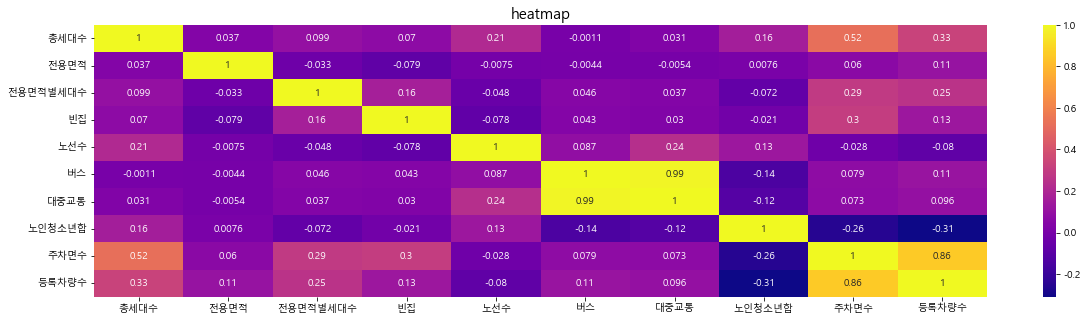

In [55]:
plt.figure(figsize=(20,5))
hmap = sns.heatmap(pre3.corr(), cmap = 'plasma', annot = True)
hmap.set_title("heatmap", fontsize=15)
plt.show()

# 3. 지역별 히트맵

In [67]:
pre2.head(3)
pre2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2869 entries, 0 to 2868
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2869 non-null   int64  
 1   단지코드        2869 non-null   object 
 2   총세대수        2869 non-null   int64  
 3   임대건물구분      2869 non-null   object 
 4   지역          2869 non-null   object 
 5   전용면적        2869 non-null   float64
 6   전용면적별세대수    2869 non-null   int64  
 7   빈집          2869 non-null   float64
 8   임대료         2300 non-null   object 
 9   노선수         2869 non-null   float64
 10  버스          2869 non-null   float64
 11  주차면수        2869 non-null   float64
 12  등록차량수       2869 non-null   float64
 13  대중교통        2869 non-null   float64
 14  노인청소년합      2869 non-null   float64
dtypes: float64(8), int64(3), object(4)
memory usage: 336.3+ KB


In [92]:
pre4 = pre2.drop(["Unnamed: 0", "단지코드", "임대건물구분","임대료"], axis=1)
pre4.columns

Index(['총세대수', '지역', '전용면적', '전용면적별세대수', '빈집', '노선수', '버스', '주차면수', '등록차량수',
       '대중교통', '노인청소년합'],
      dtype='object')

In [93]:
pre4=pre4[['총세대수', '지역','전용면적', '전용면적별세대수', '빈집', '노선수', 
           '버스', '대중교통','노인청소년합', '주차면수', '등록차량수']]

In [102]:
pre4.tail()
pre4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2869 entries, 0 to 2868
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   총세대수      2869 non-null   int64  
 1   지역        2869 non-null   object 
 2   전용면적      2869 non-null   float64
 3   전용면적별세대수  2869 non-null   int64  
 4   빈집        2869 non-null   float64
 5   노선수       2869 non-null   float64
 6   버스        2869 non-null   float64
 7   대중교통      2869 non-null   float64
 8   노인청소년합    2869 non-null   float64
 9   주차면수      2869 non-null   float64
 10  등록차량수     2869 non-null   float64
dtypes: float64(8), int64(2), object(1)
memory usage: 246.7+ KB


In [96]:
pre4["지역"].unique()

array(['경상남도', '대전광역시', '경기도', '전라북도', '강원도', '광주광역시', '충청남도', '부산광역시',
       '제주특별자치도', '울산광역시', '충청북도', '전라남도', '경상북도', '대구광역시', '서울특별시',
       '세종특별자치시'], dtype=object)

### 함수 생성

In [128]:
def data_frame (a) :
    region = pre4[pre4["지역"]==a]
    plt.figure(figsize=(20,5))
    hmap = sns.heatmap(region.corr(), cmap = 'plasma', annot = True)
    hmap.set_title(a, fontsize=15)
    plt.show()
    

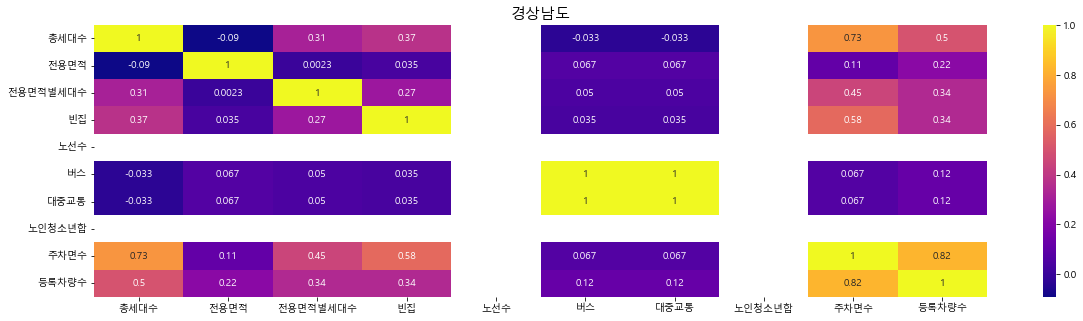

In [130]:
data_frame ("경상남도")

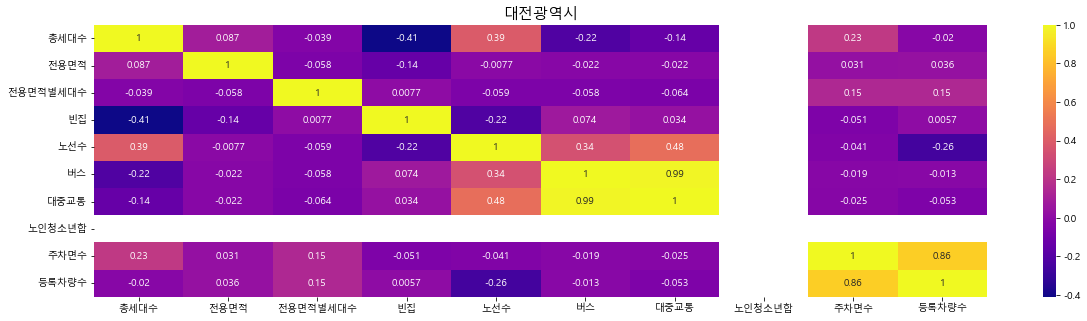

In [131]:
data_frame ( '대전광역시')

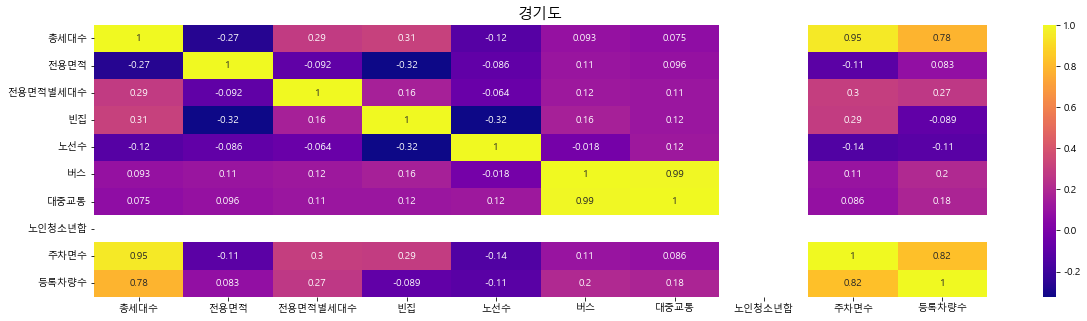

In [132]:
data_frame ('경기도')

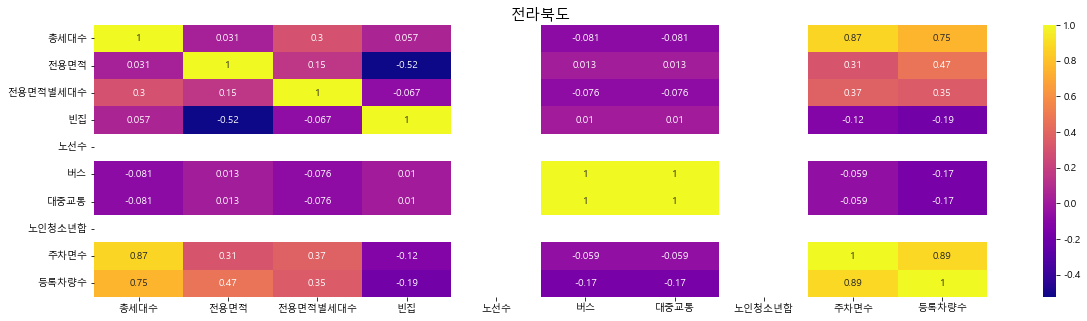

In [133]:
data_frame ( '전라북도')

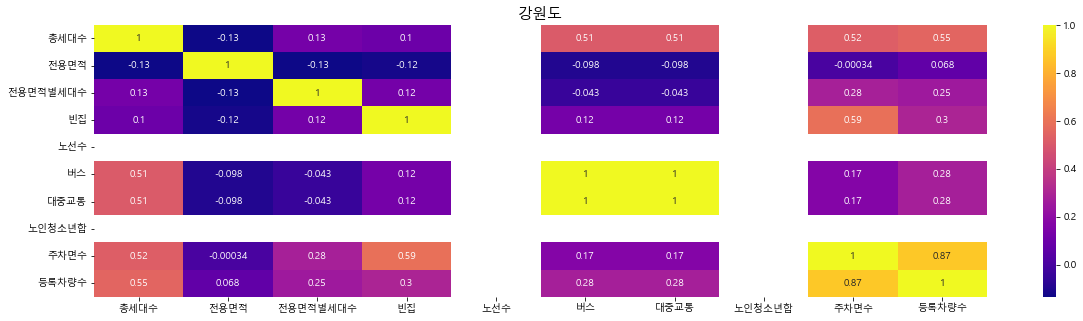

In [134]:
data_frame ('강원도')

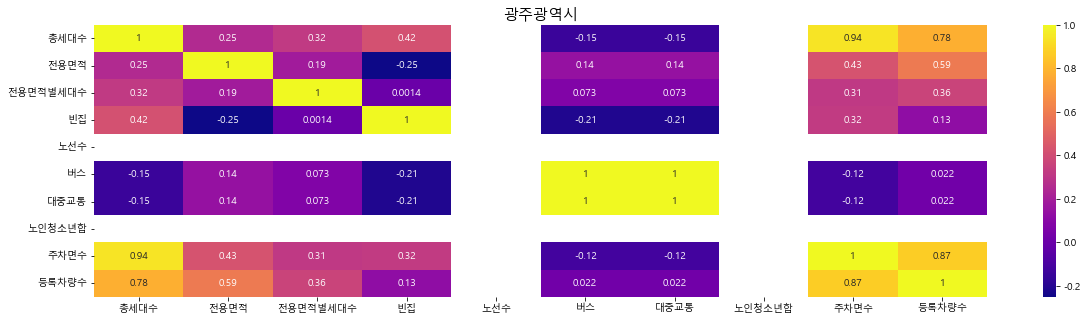

In [135]:
data_frame ('광주광역시')

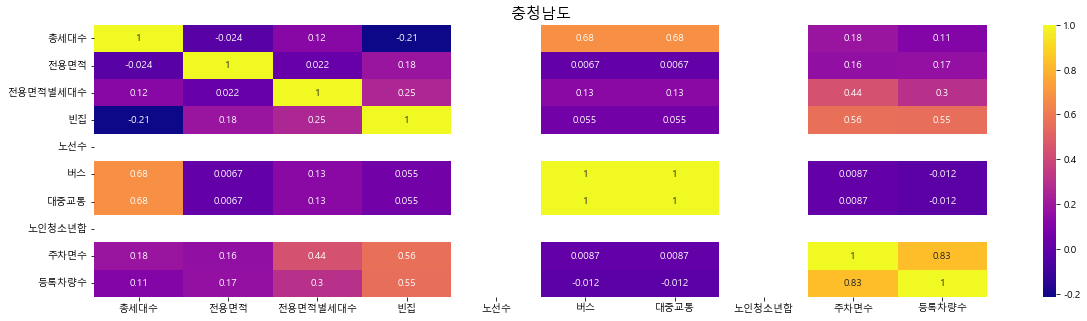

In [136]:
data_frame ('충청남도')

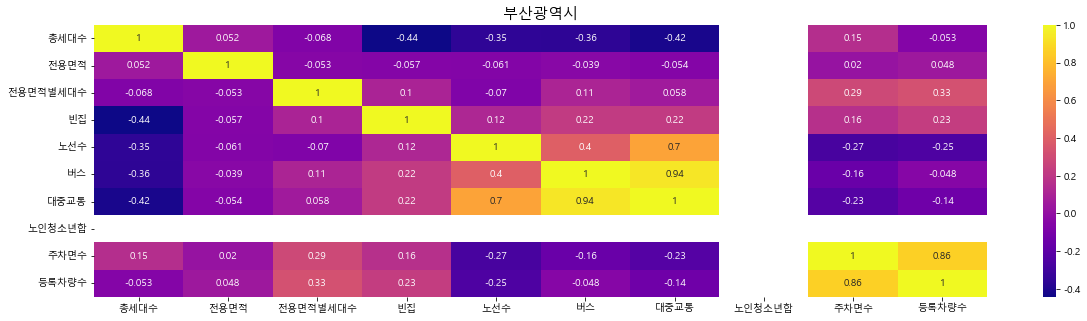

In [137]:
data_frame ('부산광역시')

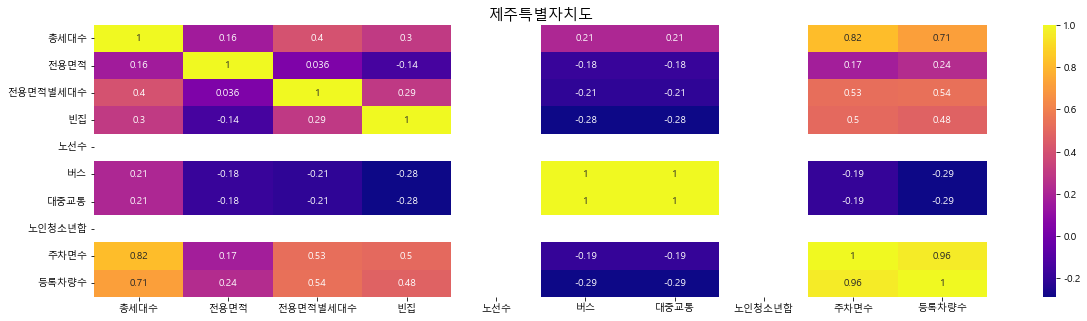

In [138]:
data_frame ('제주특별자치도')

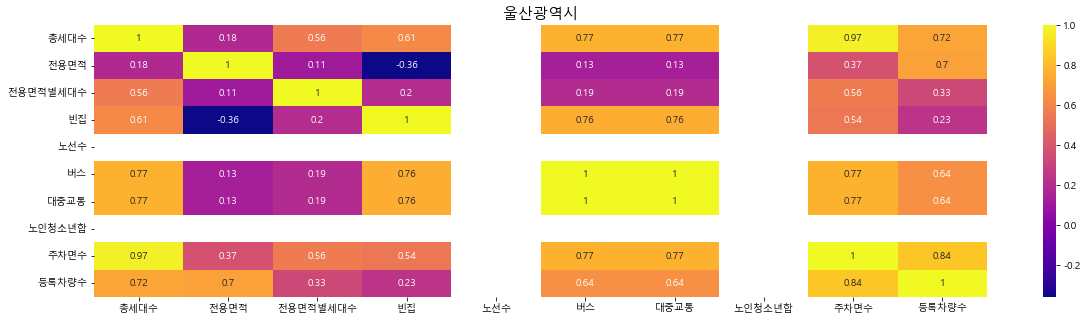

In [139]:
data_frame ('울산광역시')

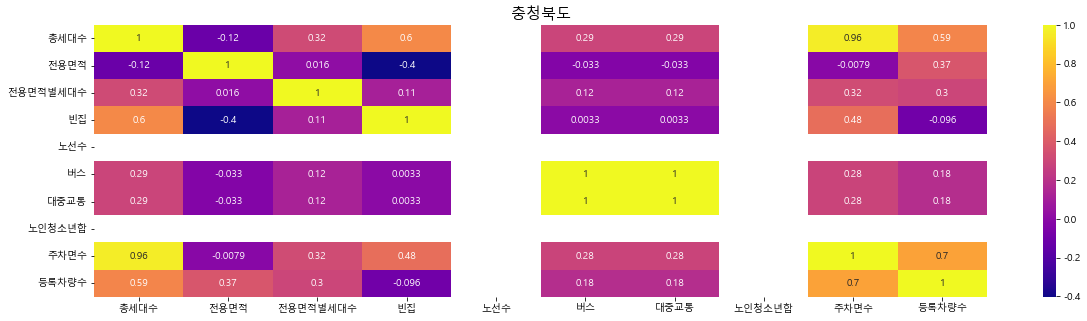

In [140]:
data_frame ('충청북도')

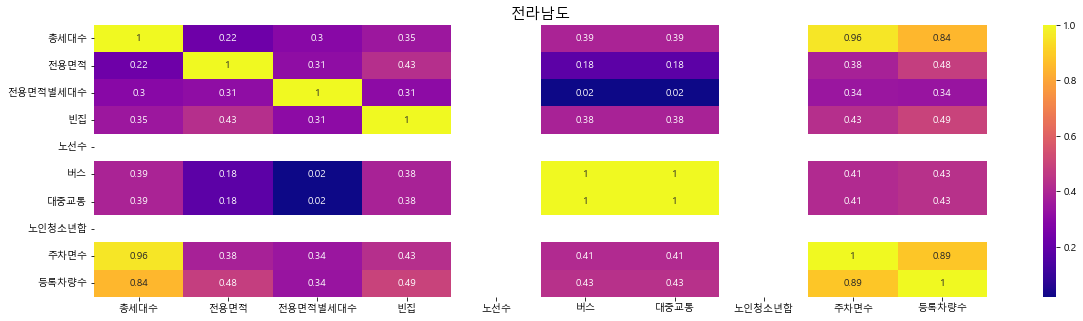

In [141]:
data_frame ('전라남도')

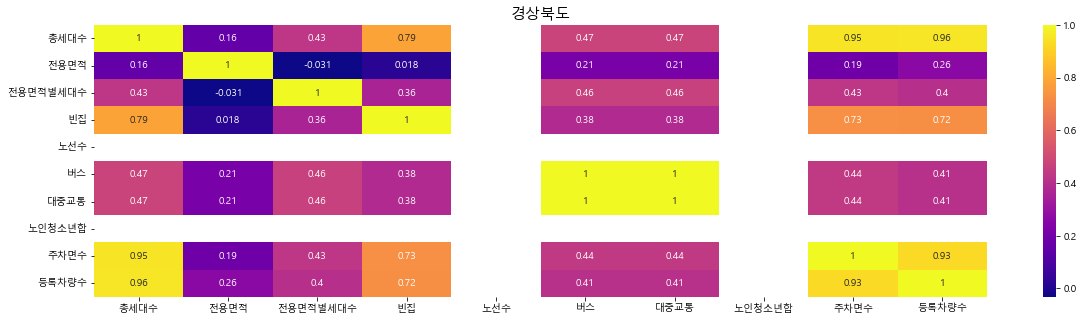

In [142]:
data_frame ( '경상북도')

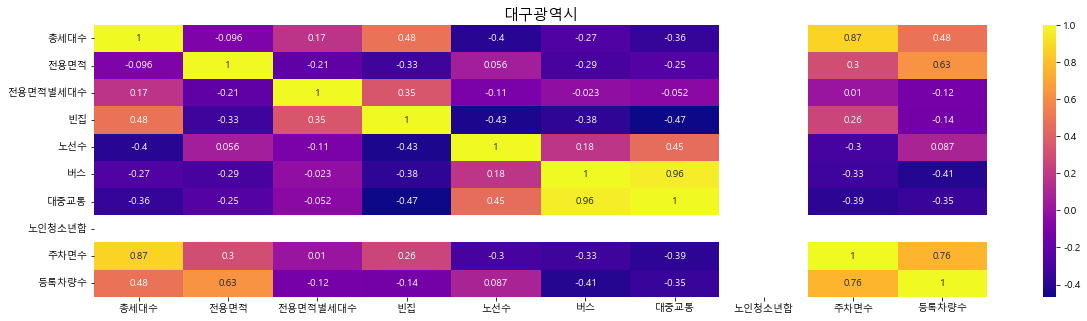

In [143]:
data_frame ('대구광역시')

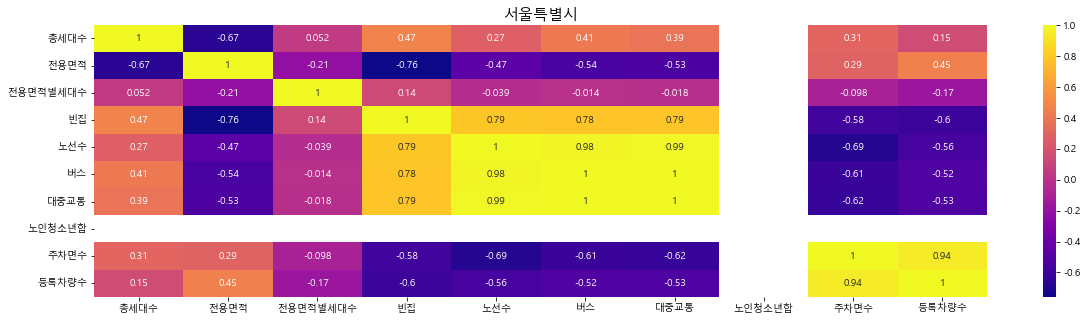

In [144]:
data_frame ('서울특별시')

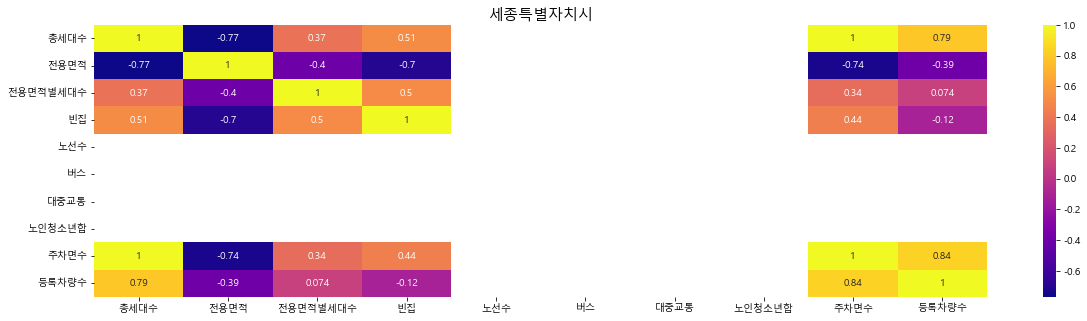

In [145]:
data_frame ('세종특별자치시')

### 지역별

In [12]:
pre = pd.read_csv("data/pre_train.csv", encoding = "euc-kr")
pre.head()
pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2869 entries, 0 to 2868
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2869 non-null   int64  
 1   단지코드        2869 non-null   object 
 2   총세대수        2869 non-null   int64  
 3   임대건물구분      2869 non-null   object 
 4   지역          2869 non-null   object 
 5   전용면적        2869 non-null   float64
 6   전용면적별세대수    2869 non-null   int64  
 7   빈집          2869 non-null   float64
 8   임대료         2300 non-null   object 
 9   노선수         2869 non-null   float64
 10  버스          2869 non-null   float64
 11  주차면수        2869 non-null   float64
 12  등록차량수       2869 non-null   float64
dtypes: float64(6), int64(3), object(4)
memory usage: 291.5+ KB
